In [233]:
import numpy as np
import matplotlib.pyplot as plt

In [451]:
t0 = 0
N = 50
nt = 5000
a = 1
m = 1
dx = 0.1
dt = 0.02
sigma = 3 * dx
tn = nt * dt
xmax = N*dx
t = np.linspace(t0, tn, nt)
s = np.zeros(2 * (N + 1))  # macierz na położenia 0 - N i prędkości atomów N+1 - 2N+1
xi = np.linspace(0, N * dx * 2+dx, 2 * N + 2)

In [445]:
def wp(x):
    return x + np.exp(-((x - xmax/2)**2)/(2*sigma**2))*dx/3

In [446]:
def RK4(k, dt, t, y):
    for i in range(1, nt+1):
        k1 = k(t[i - 1], y)
        k2 = k(t[i - 1] + dt / 2, y + dt * k1 / 2)
        k3 = k(t[i - 1] + dt / 2, y + dt * k2 / 2)
        k4 = k(t[i - 1] + dt, y + dt * k3)
        y = y + dt / 6 * (k1 + 2 * k2 + 2 * k3 + k4)
    return y

def k(t, s):
    kk = np.zeros(2 * (N + 1))
    for i in range(N):
        kk[i] = s[i + N + 1]
        kk[i + N + 1] = (a / m) * (s[i-1] - 2 * s[i] + s[i+1])  # v
    kk[0] = 0
    kk[N] = 0
    kk[N+1] = 0
    kk[2*N + 1] = 0
    return kk

In [447]:
x = np.zeros((nt, N + 1))
v = np.zeros((nt, N + 1))
T = np.zeros(nt)
U = np.zeros(nt)
xD = np.zeros((nt, N + 1))
s = wp(xi)
s[N + 1:2 * N + 2] = 0

In [448]:
for i in range(nt):
    s = RK4(k, dt, t, s)
    for j in range(N + 1):
        x[i, j] = s[j]
        v[i, j] = s[j + N + 1]
        xD[i, j] = x[i, j] - dx * j

In [449]:
for i in range(nt):
    for j in range(1,N + 1):
        T[i] += 0.5 * m * (v[i][j])**2
        U[i] += 0.5 * a * (x[i][j - 1] - x[i][j] + dx)**2

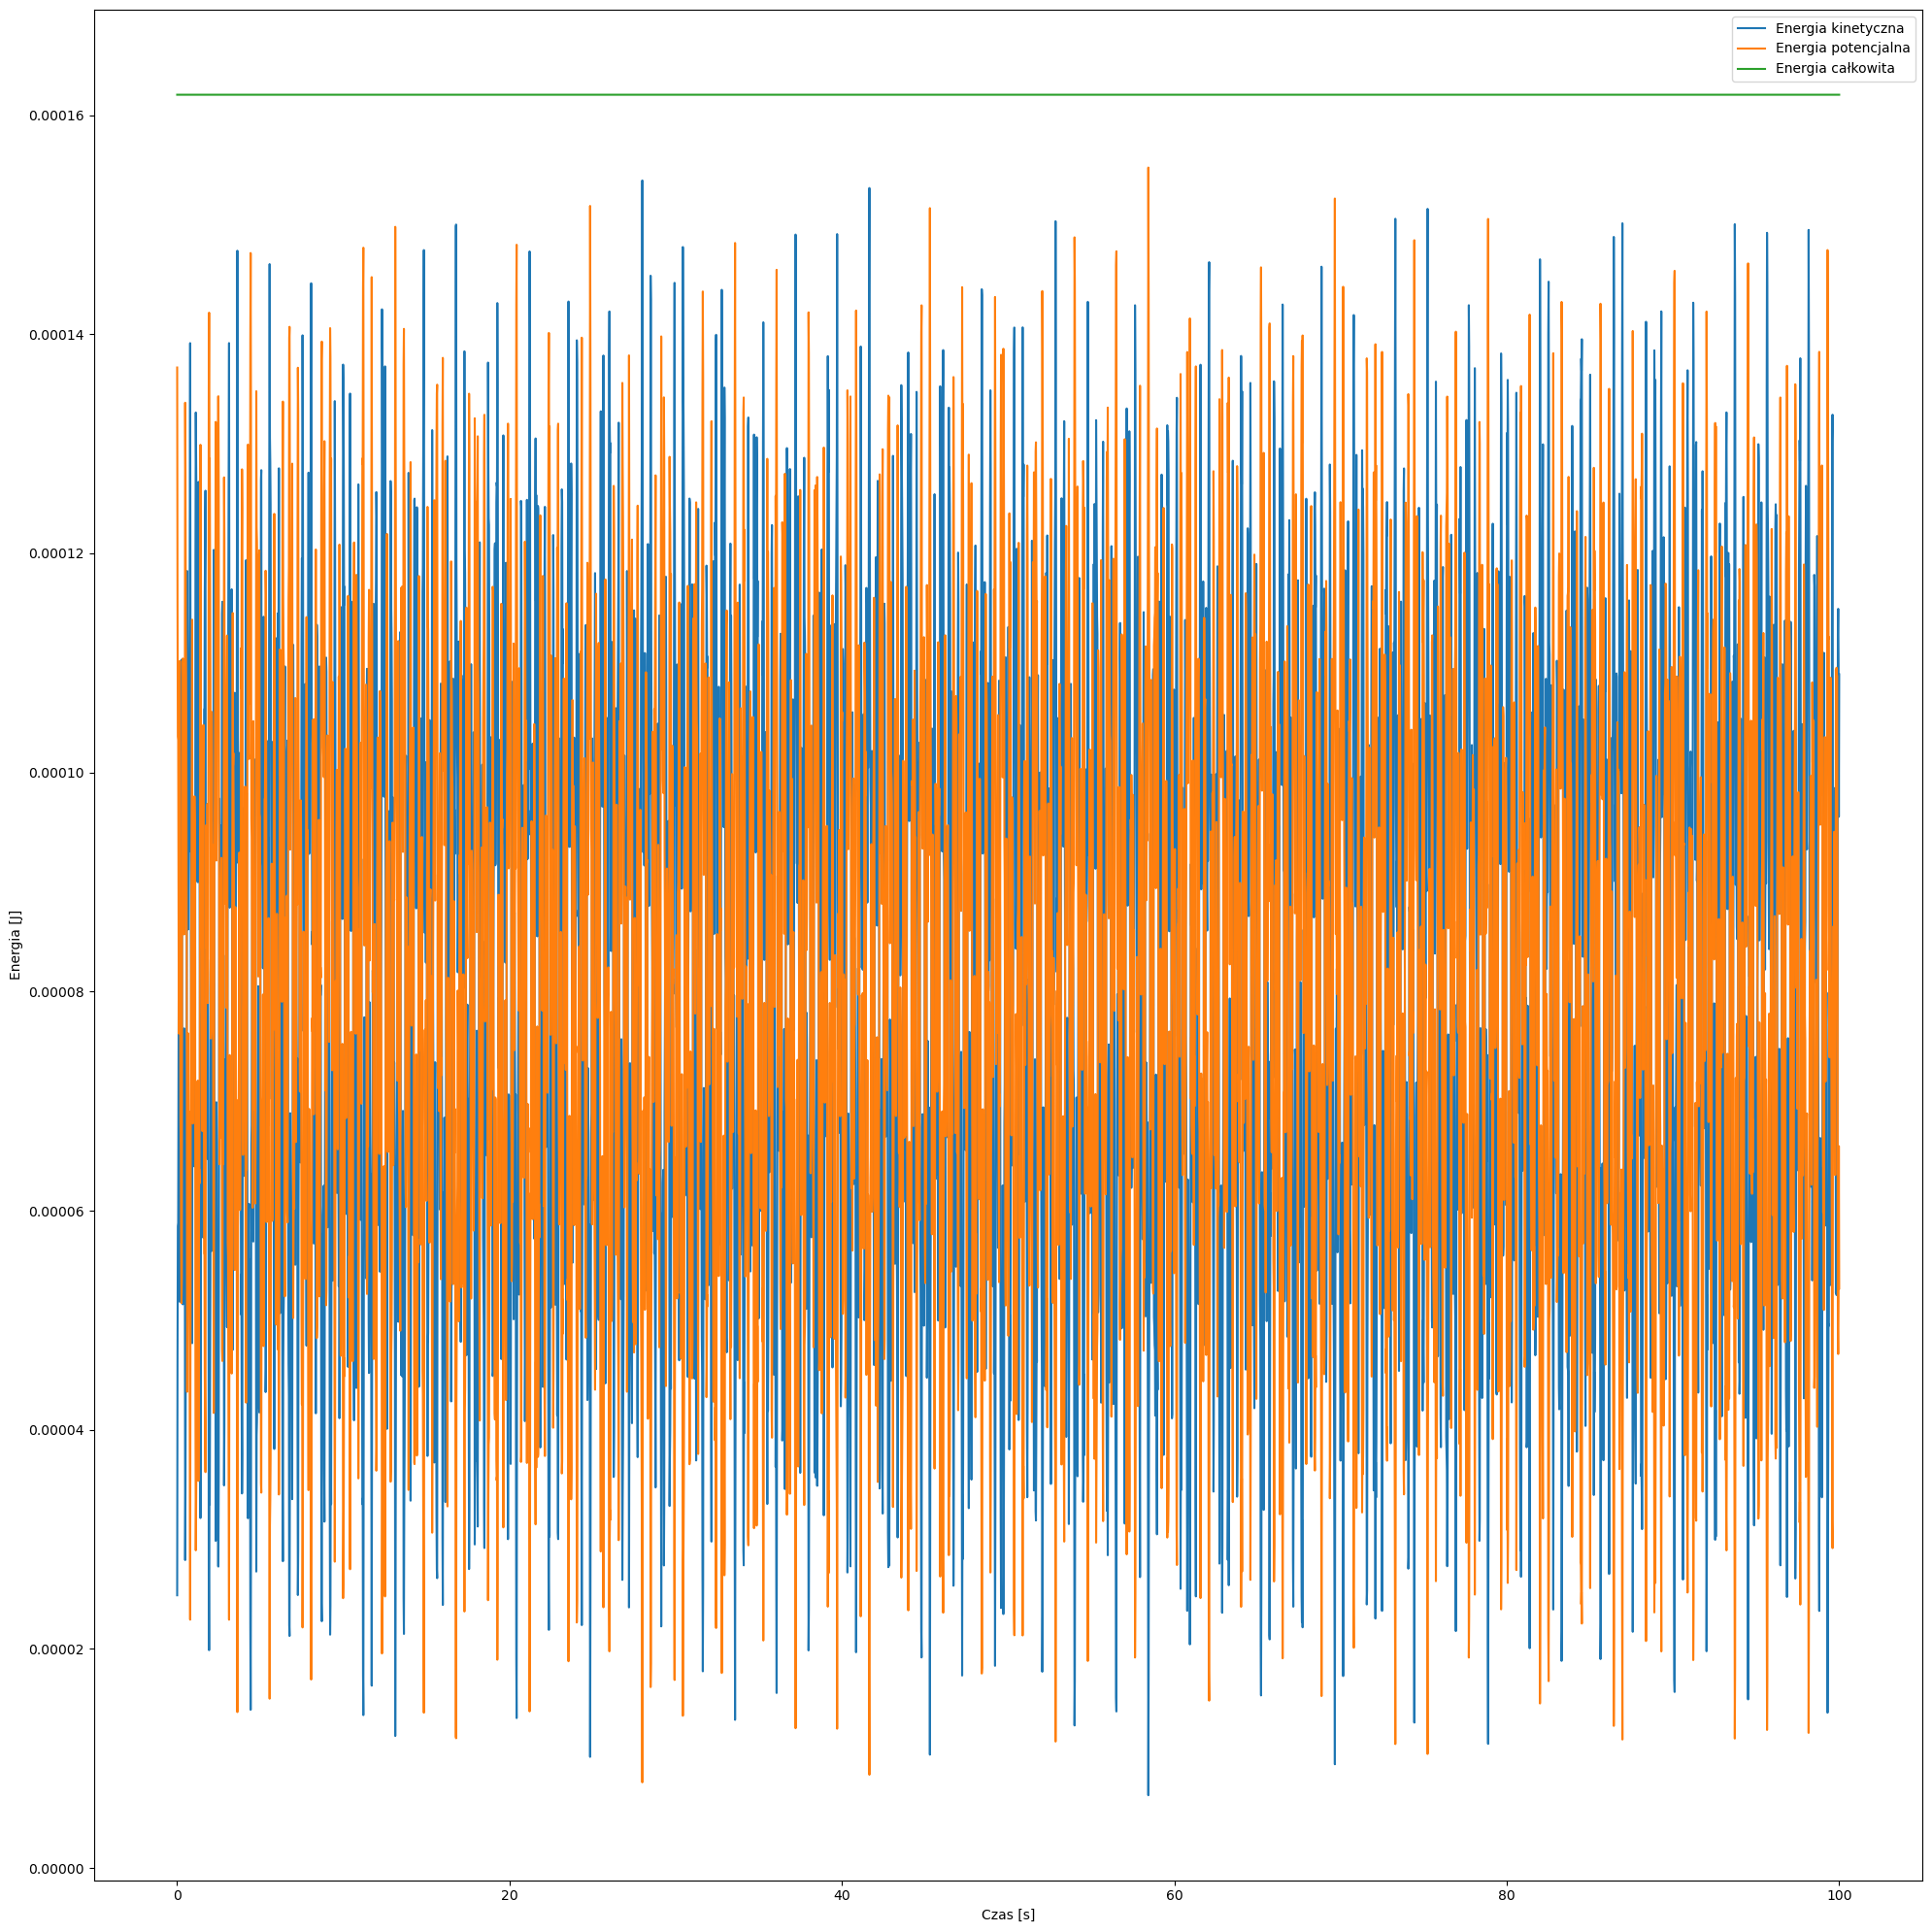

In [466]:
plt.figure(figsize=(20,20))
plt.plot(t, T, label="Energia kinetyczna")
plt.plot(t, U, label="Energia potencjalna")
plt.plot(t, T+U, label="Energia całkowita")
plt.xlabel('Czas [s]')
plt.ylabel('Energia [J]')
plt.legend()
plt.tight_layout()
plt.show()